# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

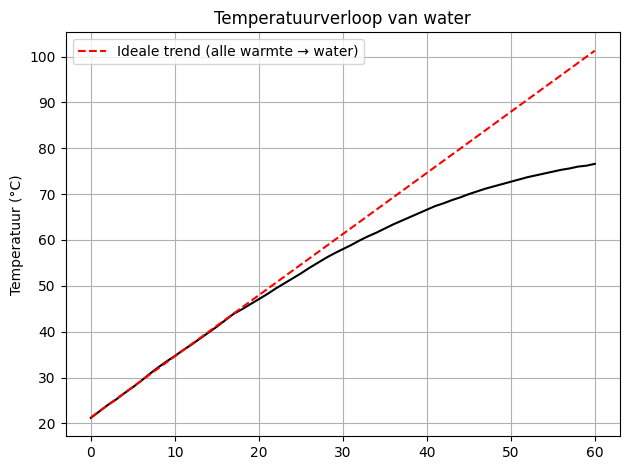


--- MASSABALANS ---
Beginmassa water: 472.10 g
Eindmassa water : 454.10 g
Verdampt water  : 18.00 g

--- ENERGIEBALANS ---
Energie voor opwarming: 109.33 kJ
Energie voor verdamping: 40.63 kJ
Totale warmte-inhoud: 149.95 kJ

--- AANBEVELINGEN VOOR VERBETERING ---
1. Gebruik een deksel om convectie-verliezen te verminderen.
2. Isoleer de maatbeker om warmteverlies te beperken.
3. Meet de omgevingstemperatuur en corrigeer voor warmtestroom naar buiten.
4. Gebruik een wattmeter om toegevoerde elektrische energie exact te meten.
5. Meet rond het kookpunt met kleinere tijdsintervallen voor betere modellering.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

data = np.loadtxt("tempmetingen.csv", delimiter = ";",skiprows=1)
tijd = data[:,0] 
temp = data[:,1]

plt.figure()
plt.plot(tijd,temp,"k")
plt.xlabel = "Tijd (min)"
plt.ylabel("Temperatuur (°C)")

mask = tijd < 15
slope, intercept, r, p, se = linregress(tijd[mask], temp[mask])

ideale_temp = intercept + slope * tijd

plt.plot(tijd, ideale_temp, 'r--', label="Ideale trend (alle warmte → water)")
plt.title("Temperatuurverloop van water")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 3. MASSA’S EN VERDAMPING


m_beker = 820.8         # g
m_tot_start = 1292.9    # g
m_tot_eind = 1274.9     # g

m_water_start = m_tot_start - m_beker
m_water_eind = m_tot_eind - m_beker

m_verdampt = m_water_start - m_water_eind

print("\n--- MASSABALANS ---")
print(f"Beginmassa water: {m_water_start:.2f} g")
print(f"Eindmassa water : {m_water_eind:.2f} g")
print(f"Verdampt water  : {m_verdampt:.2f} g")


# 4. ENERGIEBEREKENING


c = 4.180  # J/g°C
T0 = temp[0]
T_end = temp[-1]

# energie voor opwarming
Q_opw = m_water_start * c * (T_end - T0)

# energie voor verdamping
Lv = 2257  # J/g (latente warmte)
Q_verdampt = m_verdampt * Lv

Q_tot = Q_opw + Q_verdampt

print("\n--- ENERGIEBALANS ---")
print(f"Energie voor opwarming: {Q_opw/1000:.2f} kJ")
print(f"Energie voor verdamping: {Q_verdampt/1000:.2f} kJ")
print(f"Totale warmte-inhoud: {Q_tot/1000:.2f} kJ")

Het vermogen is 460.4549 W
105.20000000000013


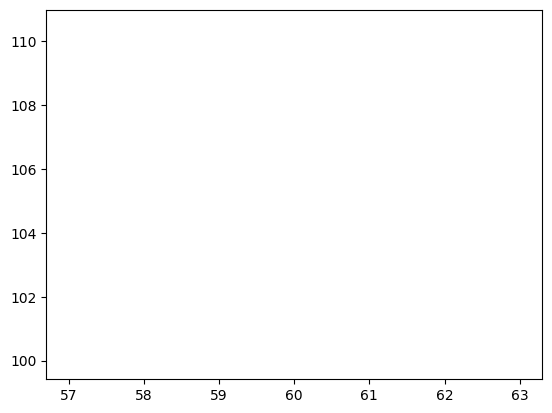

In [ ]:
m = 1292.9 - 820.8
c = 41.8
dT = temp[1]-temp[0]
t = 60
P = (c*m*dT)/t
print("Het vermogen is %.4f W" % (P))
temp_theorie = temp[0] + (P*t*60)/ (m*c)
print(temp_theorie)

plt.figure
plt.plot(t, temp_theorie)
plt.xlabel = 'Tijd (min)'
plt.ylabel = 'Temperatuur (graden)'